<a href="https://colab.research.google.com/github/SrijanDawn/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [36]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [37]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [80]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,290.530670,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05,290.608002,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06,284.036987,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07,276.132629,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08,270.489410,349.899994,359.250000,348.250000,358.000000,6048178


In [39]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

<ipython-input-39-8097d146b7ad>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,375.825012,379.450012,374.524994,377.399994,1963682
1,375.924988,379.774994,373.274994,377.500000,2014488
2,367.424988,376.100006,366.500000,375.924988,3349176
3,357.200012,369.700012,355.500000,367.750000,6474892
4,349.899994,359.250000,348.250000,358.000000,6048178


Visualizing Closing Price

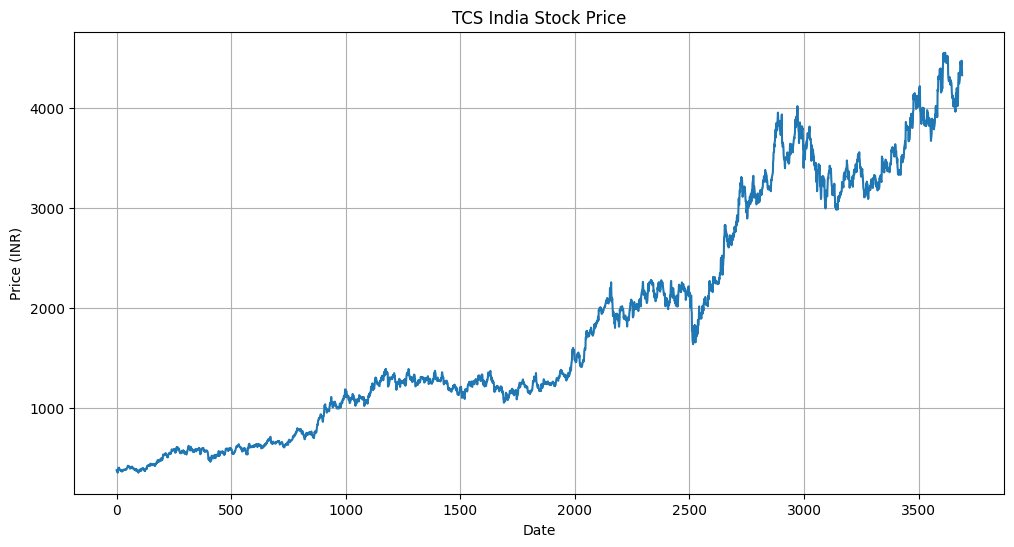

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [41]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,375.825012,379.450012,374.524994,377.399994,1963682
1,375.924988,379.774994,373.274994,377.500000,2014488
2,367.424988,376.100006,366.500000,375.924988,3349176
3,357.200012,369.700012,355.500000,367.750000,6474892
4,349.899994,359.250000,348.250000,358.000000,6048178
...,...,...,...,...,...
3686,4427.450195,4448.649902,4407.000000,4431.850098,1635256
3687,4454.950195,4485.000000,4426.000000,4430.049805,1914642
3688,4473.899902,4494.899902,4394.399902,4434.950195,1967048


# Plotting moving averages of 100 day

---



In [42]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3686,4285.001492
3687,4286.526995
3688,4288.392493
3689,4289.520994


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

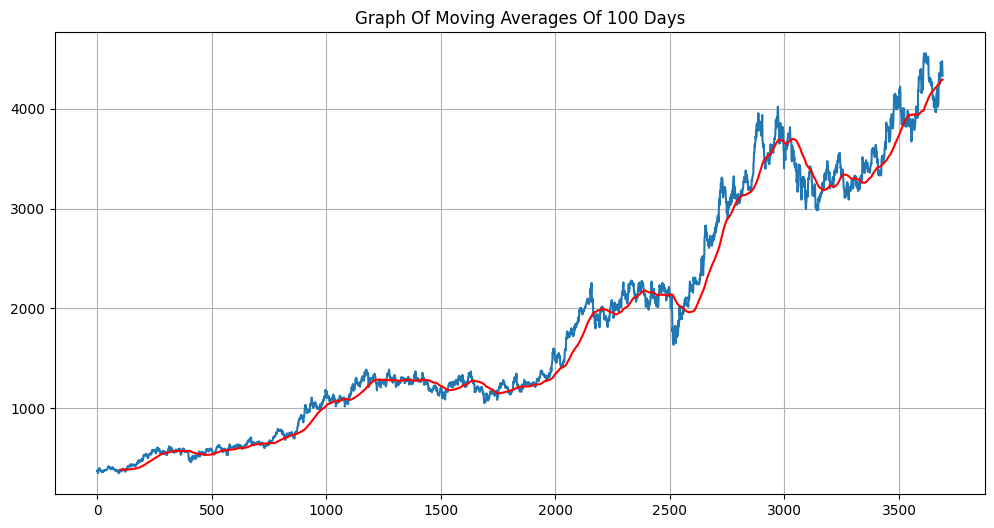

In [43]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [44]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3686,4112.699244
3687,4114.454996
3688,4116.671246
3689,4118.789747


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

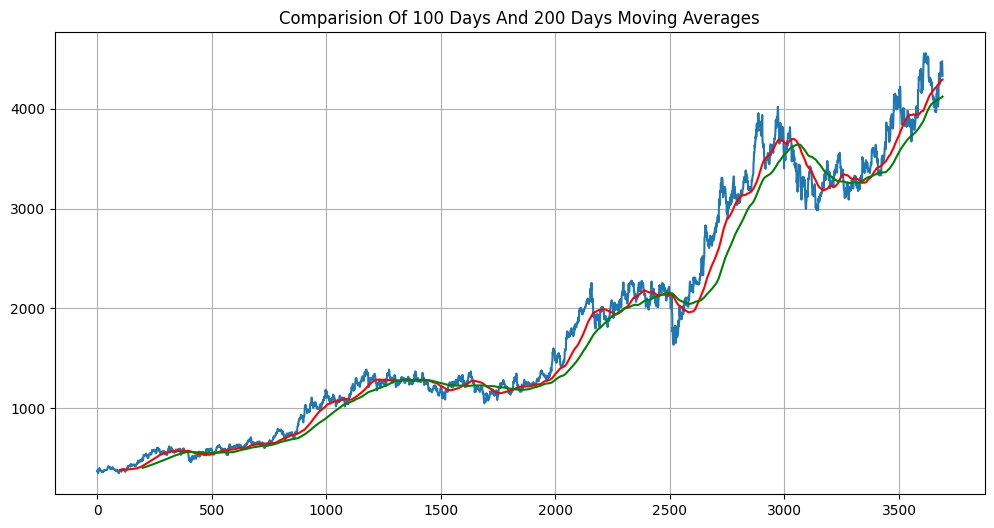

In [45]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [46]:
df.shape

(3691, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [47]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2583, 7)
(1108, 7)


In [48]:
train.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,290.530670,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05,290.608002,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06,284.036987,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07,276.132629,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08,270.489410,349.899994,359.250000,348.250000,358.000000,6048178


In [49]:
test.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2583,2020-06-30,1925.885620,2082.149902,2111.899902,2075.050049,2100.000000,3071725
2584,2020-07-01,1935.042969,2092.050049,2113.949951,2079.500000,2079.699951,2503466
2585,2020-07-02,1995.256958,2157.149902,2165.000000,2098.000000,2102.000000,3758699
2586,2020-07-03,2034.567749,2199.649902,2205.000000,2160.250000,2163.649902,4185208
2587,2020-07-06,2093.348145,2263.199951,2269.899902,2205.000000,2205.000000,5190366


# Using MinMax scaler for normalization of the dataset

---



In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [51]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [52]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01671754],
       [0.01606246],
       [0.01251195],
       ...,
       [0.87341306],
       [0.87902048],
       [0.91641228]])

In [53]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [54]:
x_train.shape

(2483, 100, 1)

# ML Model (LSTM)

---



In [55]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [56]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [58]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - loss: 0.1065 - mean_absolute_error: 0.2444
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0087 - mean_absolute_error: 0.0655
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0084 - mean_absolute_error: 0.0625
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0075 - mean_absolute_error: 0.0610
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0065 - mean_absolute_error: 0.0551
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0061 - mean_absolute_error: 0.0528
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0059 - mean_absolute_error: 0.0525
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0055 - mean_absolute_error: 0.0503
Epoch 9/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0050 - mean_absolute_error: 0.0494
Epoch 10/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0050 - mean_absolute_error: 0.0479
Epoch 11/100
78/78 ━━━━━━━

In [59]:
model.save('keras_model.h5')

In [60]:
test_close.shape

(1108, 1)

In [61]:
past_100_days = pd.DataFrame(train_close[-100:])

In [62]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [63]:
# final_df = past_100_days.append(test_df, ignore_index = True)
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [64]:
final_df.head()

,0
0,2125.000000
1,2071.600098
2,2093.199951
3,2086.600098
4,2104.300049


In [65]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.20590827],
       [0.18814353],
       [0.19532923],
       ...,
       [0.96087756],
       [0.96174254],
       [0.93546133]])

In [66]:
input_data.shape

(1208, 1)

# Testing the model

---



In [67]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [68]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1108, 100, 1)
(1108,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [69]:
# Making predictions

y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step


In [70]:
y_pred.shape

(1108, 1)

In [71]:
y_test

array([0.18929124, 0.19077162, 0.19692608, ..., 0.96087756, 0.96174254,
       0.93546133])

In [72]:
y_pred

array([[0.20238754],
       [0.2028297 ],
       [0.20397198],
       ...,
       [0.91133523],
       [0.91136324],
       [0.90904117]], dtype=float32)

In [73]:
scaler.scale_

array([0.00033267])

In [74]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

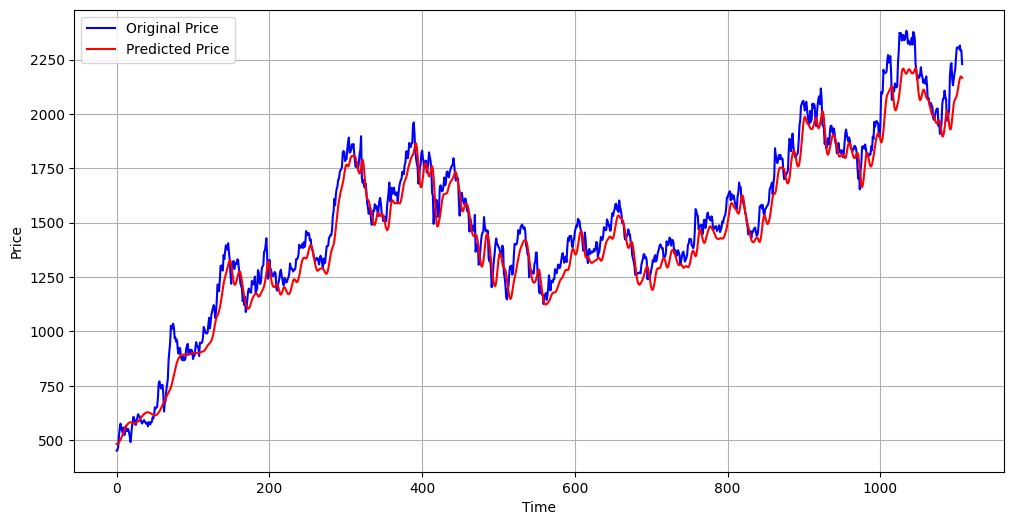

In [75]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [76]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 4.56%


Calculation of R2 score

In [77]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9527636931821798


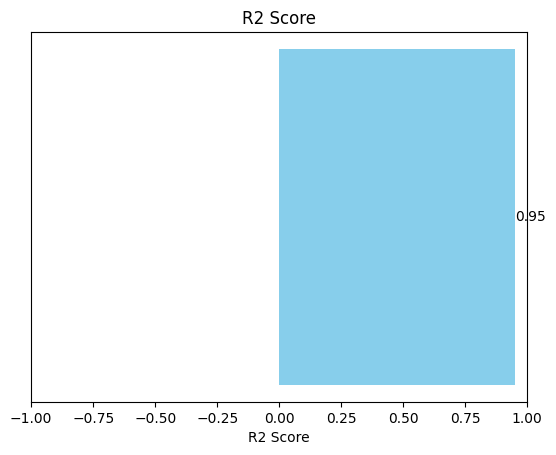

In [88]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

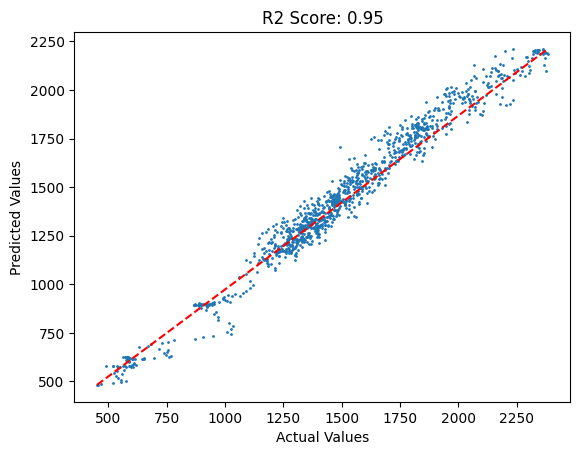

In [85]:
plt.scatter(actual, predicted, s=1)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()